# Aplicação de Equação Diferencial Ordinária (EDO)

Usando métodos númericos de EDO para comparar com valores experimentais.

## Dados

Altura da coluna d'água em função do tempo.

| Altura (cm) | Tempo (s) |
|---|---|
| 20.0 | 0.0 |
| 18.9 | 0.2 |
| 17.6 | 0.4 |
| 16.4 | 0.6 |
| 15.4 | 0.8 |
| 14.5 | 10.0 |
| 13.5 | 12.0 |
| 12.5 | 14.0 |
| 11.3 | 16.0 |
| 10.4 | 18.0 |
| 9.5  | 20.0 |
| 8.6  | 22.0 |
| 7.6  | 24.0 |
| 6.9  | 26.0 |
| 6.4  | 28.0 |
| 5.8  | 30.0 |
| 5.0  | 32.0 |
| 4.9  | 34.0 |
| 3.9  | 36.0 |
| 3.4  | 38.0 |
| 3.0  | 40.0 |
| 2.5  | 42.0 |
| 2.3  | 44.0 |
| 1.9  | 46.0 |
| 1.6  | 48.0 |
| 1.4  | 50.0 |
| 1.1  | 52.0 |

## Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Plotando os dados

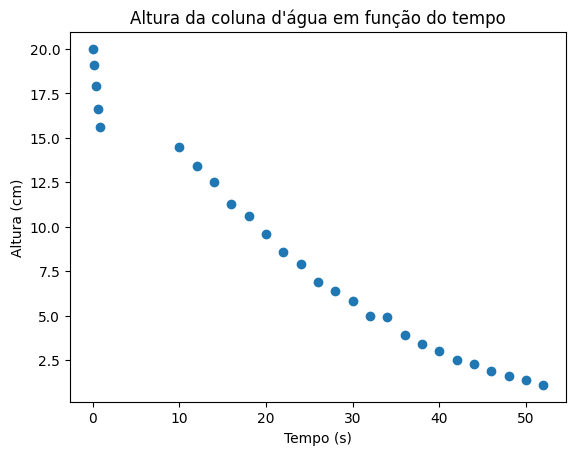

In [2]:
array = np.array([
    [20.0, 0.0],
    [19.1, 0.2],
    [17.9, 0.4],
    [16.6, 0.6],
    [15.6, 0.8],
    [14.5, 10.0],
    [13.4, 12.0],
    [12.5, 14.0],
    [11.3, 16.0],
    [10.6, 18.0],
    [9.6, 20.0],
    [8.6, 22.0],
    [7.9, 24.0],
    [6.9, 26.0],
    [6.4, 28.0],
    [5.8, 30.0],
    [5.0, 32.0],
    [4.9, 34.0],
    [3.9, 36.0],
    [3.4, 38.0],
    [3.0, 40.0],
    [2.5, 42.0],
    [2.3, 44.0],
    [1.9, 46.0],
    [1.6, 48.0],
    [1.4, 50.0],
    [1.1, 52.0]
])

plt.plot(array[:,1], array[:,0], 'o')
plt.title('Altura da coluna d\'água em função do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (cm)')
plt.show()

## Problema de Valor Inicial (PVI)

In [3]:
exp = '- 0.0315 * np.sqrt(2 * 9.8 * y)'
g = lambda x, y: eval(exp) if y >= 0 else 0
t0 = array[0,1]
y0 = array[0,0]
h = 4.0
n = 12

## Métodos

0.815


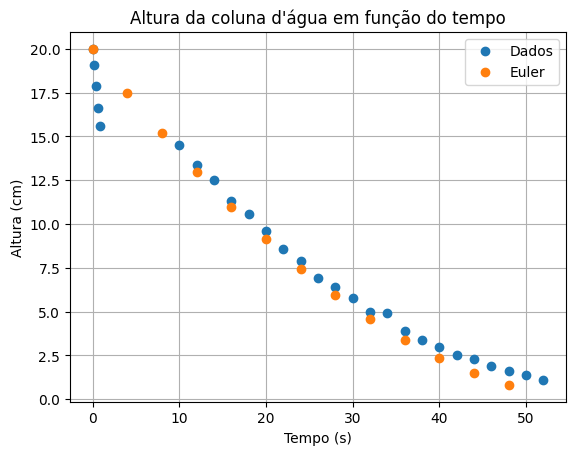

In [4]:
def euler(g, x0, y0, h, n):
  x = np.zeros(n + 1)
  y = np.zeros(n + 1)
  x[0] = x0
  y[0] = y0

  for i in range(n):
    y_next = y[i] + h * g(x[i], y[i])
    y[i + 1] = max(0, y_next)
    x[i + 1] = x[i] + h

  return x, y

xEuler, yEuler = euler(g, t0, y0, h, n)
saida = yEuler[n]
print(f'{saida:.3f}')

plt.plot(array[:,1], array[:,0], 'o', label='Dados')
plt.plot(xEuler, yEuler, 'o', label='Euler')
plt.title('Altura da coluna d\'água em função do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (cm)')
plt.legend()
plt.grid(True)
plt.show()

0.919


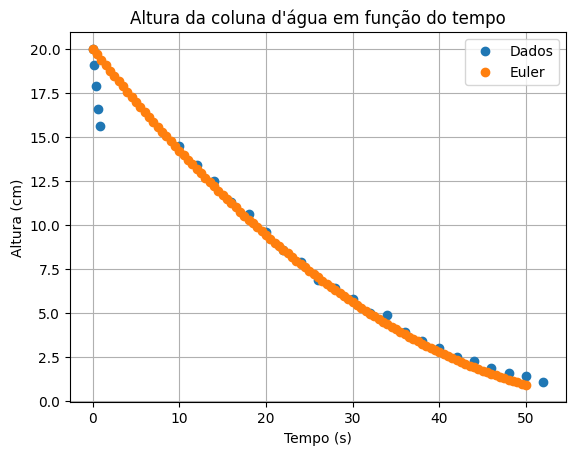

In [5]:
h = 0.5
n = 100

xEuler, yEuler = euler(g, t0, y0, h, n)
saida = yEuler[n]
print(f'{saida:.3f}')

plt.plot(array[:,1], array[:,0], 'o', label='Dados')
plt.plot(xEuler, yEuler, 'o', label='Euler')
plt.title('Altura da coluna d\'água em função do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (cm)')
plt.legend()
plt.grid(True)
plt.show()

9.471


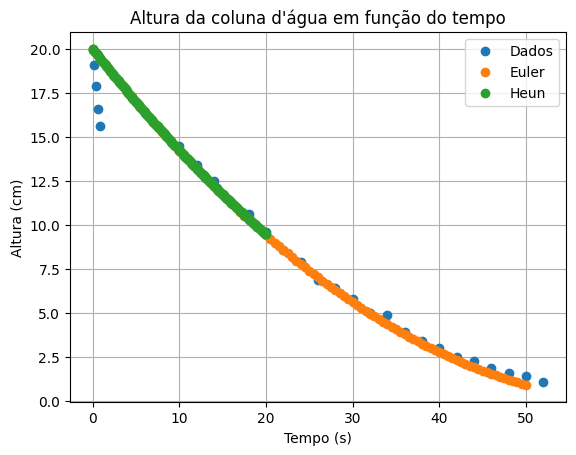

In [6]:
h = 0.1
n = 200

def heun(g, x0, y0, h, n):
  x = np.zeros(n + 1)
  y = np.zeros(n + 1)
  x[0] = x0
  y[0] = y0

  for i in range(1, n+1):
    k1 = h * g(x[i-1], y[i-1])
    k2 = h * g(x[i-1] + h, y[i-1] + k1)
    y[i] = y[i-1] + 0.5 * (k1 + k2)
    x[i] = x[i-1] + h

  return x, y

xHeun, yHeun = heun(g, t0, y0, h, n)
saida = yHeun[n]
print(f'{saida:.3f}')

plt.plot(array[:,1], array[:,0], 'o', label='Dados')
plt.plot(xEuler, yEuler, 'o', label='Euler')
plt.plot(xHeun, yHeun, 'o', label='Heun')
plt.title('Altura da coluna d\'água em função do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (cm)')
plt.legend()
plt.grid(True)
plt.show()

9.471


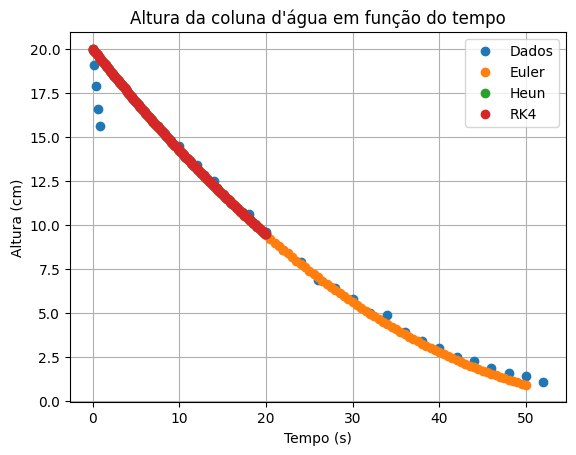

In [7]:
def rk4(g, x0, y0, h, n):
  x = np.zeros(n + 1)
  y = np.zeros(n + 1)
  x[0] = x0
  y[0] = y0

  for i in range(1, n+1):
    k1 = h * g(x[i-1], y[i-1])
    k2 = h * g(x[i-1] + h/2, y[i-1] + k1/2)
    k3 = h * g(x[i-1] + h/2, y[i-1] + k2/2)
    k4 = h * g(x[i-1] + h, y[i-1] + k3)
    y[i] = y[i-1] + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    x[i] = x[i-1] + h

  return x, y

xRK4, yRK4 = rk4(g, t0, y0, h, n)
saida = yRK4[n]
print(f'{saida:.3f}')

plt.plot(array[:,1], array[:,0], 'o', label='Dados')
plt.plot(xEuler, yEuler, 'o', label='Euler')
plt.plot(xHeun, yHeun, 'o', label='Heun')
plt.plot(xRK4, yRK4, 'o', label='RK4')
plt.title('Altura da coluna d\'água em função do tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (cm)')
plt.legend()
plt.grid(True)
plt.show()